In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from windrose import WindroseAxes
%matplotlib inline     
sns.set(color_codes=True)

togo_df = pd.read_csv("../data/togo-dapaong_qc.csv")
togo_df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

1. **Summary statistics**

In [5]:
togo_df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
GHI,525600.0,201.957515,298.495150,-19.5,0.3,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.1,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-0.1,892.0
ModA,525600.0,206.643095,300.896893,0.0,3.6,1507.0
ModB,525600.0,198.114691,288.889073,0.0,3.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,25.3,39.9
RH,525600.0,79.448857,20.520775,9.9,85.4,100.0
WS,525600.0,1.146113,1.239248,0.0,0.8,19.2
WSgust,525600.0,1.691606,1.617053,0.0,1.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.4,4.1


2. **Data Quality Check**

In [6]:
togo_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

From the output above, there are no missing values for all columns from the dataset except for the 'Comments' column.
The total number of missing values for this column *equals* the number of rows for the dataset. This indicates that
there is no data for the 'Comments' column for all records. Therefore, the 'Comments' column must be _dropped_.

In [7]:
# Drop 'Comments' column
togo_df = togo_df.dropna(axis=1,thresh=100000)
togo_df.count()

Timestamp        525600
GHI              525600
DNI              525600
DHI              525600
ModA             525600
ModB             525600
Tamb             525600
RH               525600
WS               525600
WSgust           525600
WSstdev          525600
WD               525600
WDstdev          525600
BP               525600
Cleaning         525600
Precipitation    525600
TModA            525600
TModB            525600
dtype: int64

In [8]:
df_excluded = togo_df.drop(columns=['Timestamp'])
# Function to count outliers for a specific column
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Count outliers for every column
outlier_counts = df_excluded.apply(count_outliers)

print("Outlier counts for each column:")
print(outlier_counts)

Outlier counts for each column:
GHI               15853
DNI              101688
DHI                4407
ModA              21017
ModB              20613
Tamb                652
RH                11865
WS                 3169
WSgust             3665
WSstdev             812
WD                    0
WDstdev            4918
BP                17264
Cleaning            508
Precipitation     12069
TModA               772
TModB                 9
dtype: int64


Using interquartile range(IQR) for determining outliers, the output of the cell above indicates the number of outliers for each column.

In [9]:
def remove_outliers(column):
    if column.name != "Timestamp":
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #print(df_no_outliers[column.name])
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column
    
df_no_outliers = togo_df.apply(remove_outliers)
df_no_outliers.count()


Timestamp        525600
GHI              509747
DNI              423912
DHI              521193
ModA             504583
ModB             504987
Tamb             524948
RH               513735
WS               522431
WSgust           521935
WSstdev          524788
WD               525600
WDstdev          520682
BP               508336
Cleaning         525092
Precipitation    513531
TModA            524828
TModB            525591
dtype: int64

In [10]:
#Function to count the number of negative values for a given column
def count_negatives(column):
    negtvs = [ x for x in column if x < 0]
    return len(negtvs)
    
# Count outliers for every column
negative_counts = df_excluded.apply(count_negatives)
#negative_counts = count_negatives(benin_df['GHI'])
print("Negative value counts for each column:")
print(negative_counts)

Negative value counts for each column:
GHI              261135
DNI              266352
DHI              263128
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64


The above output shows that almost half of the dataset contains negative values for the irradiance measurements, which is erroneous. Therefore, those rows containing negative values must be removed before doing further analysis.

In [11]:
# Filter out rows where 'GHI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['GHI'] >= 0]

# Filter out rows where 'DNI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['DNI'] >= 0]

# Filter out rows where 'DHI' is less than 0
df_corrected = df_no_outliers[df_no_outliers['DHI'] >= 0]

df_corrected.shape


(258065, 18)

3.**Time Series Analysis**

_GHI across Time_

C:\Users\MIT\AppData\Local\Temp\ipykernel_10736\2111871994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrected['Timestamp'] = pd.to_datetime(df_corrected['Timestamp'])


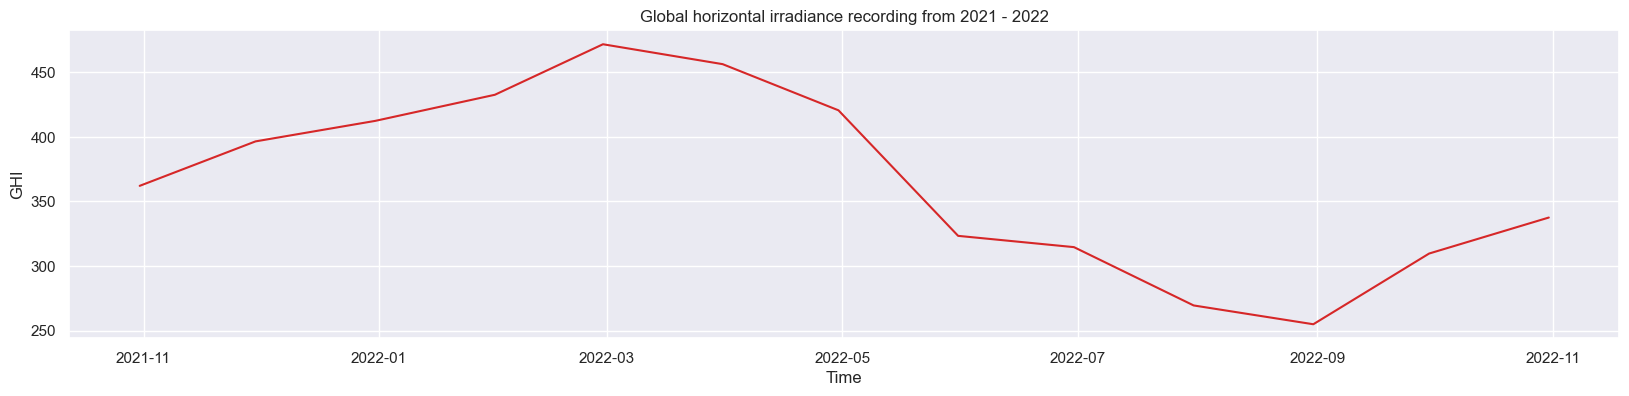

In [12]:
df_corrected['Timestamp'] = pd.to_datetime(df_corrected['Timestamp'])
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'GHI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='GHI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['GHI'], title='Global horizontal irradiance recording from 2021 - 2022')

_DNI acro

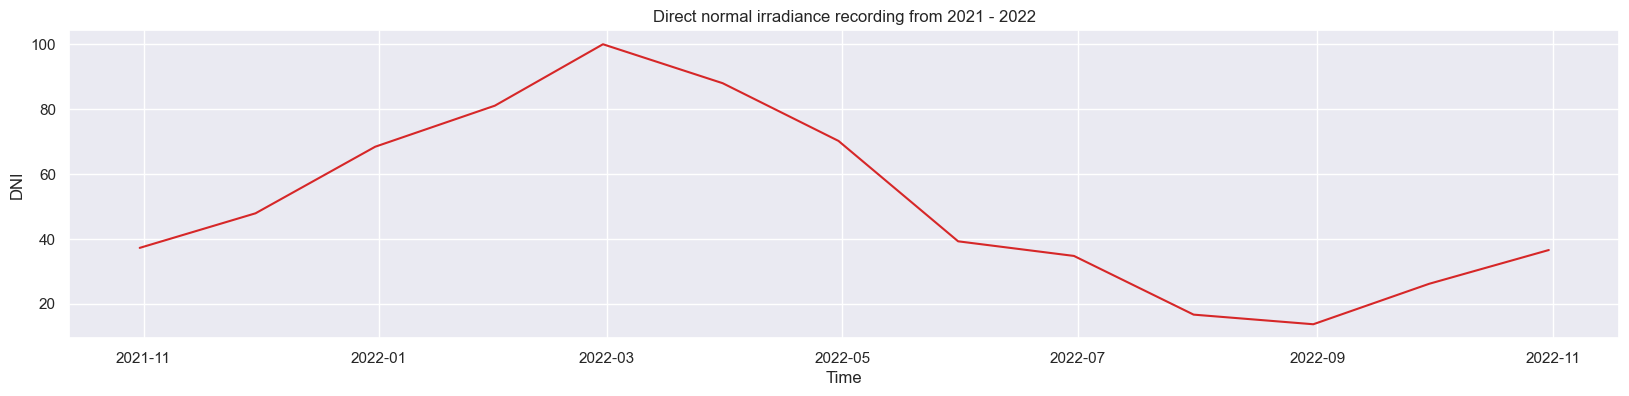

In [13]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'DNI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='DNI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['DNI'], title='Direct normal irradiance recording from 2021 - 2022')

_DHI across Time_

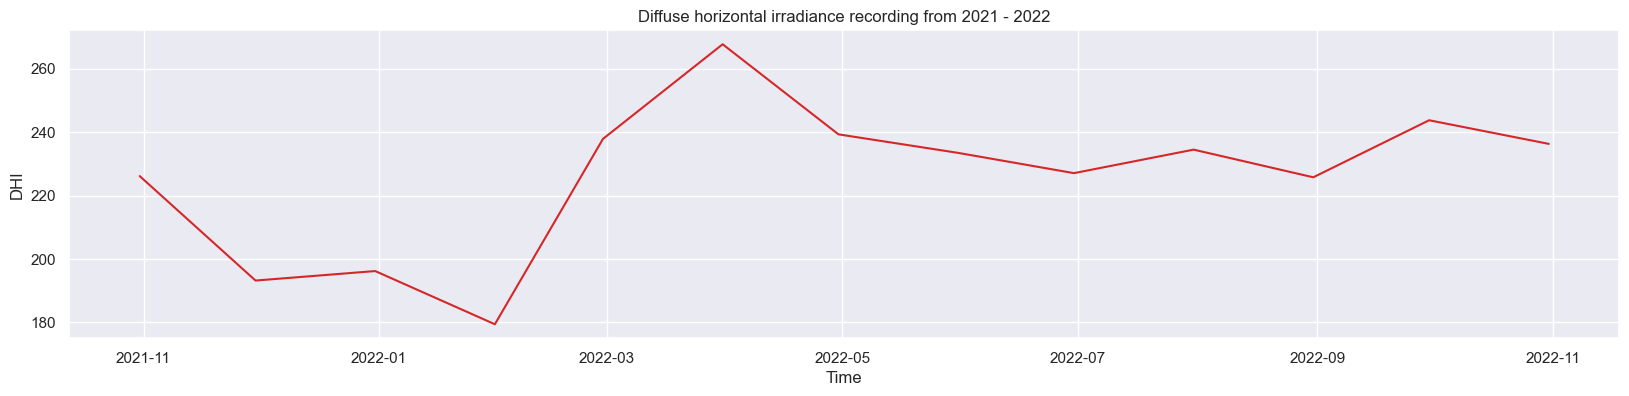

In [14]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'DHI']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='DHI', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['DHI'], title='Diffuse horizontal irradiance recording from 2021 - 2022')

_Ambient temprature across Time_

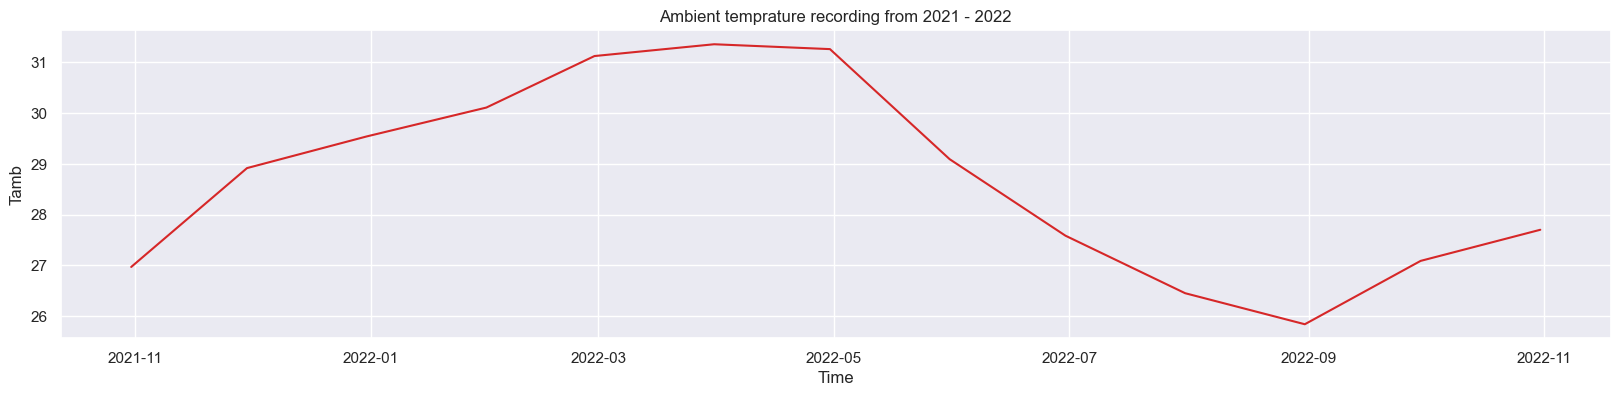

In [15]:
ts_indexed_df = df_corrected.loc[:, ['Timestamp', 'Tamb']]
ts_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ts_indexed_df.resample('ME').mean()

def plot_df(df, x, y, title="", xlabel='Time', ylabel='Tamb', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y=monthly_data['Tamb'], title='Ambient temprature recording from 2021 - 2022')

4.**Correlation Analysis**

In [16]:
df_extracted = df_corrected.loc[:,['GHI','DNI','DHI','TModA','TModB']]
df_extracted.corr()

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.447858,0.735546,0.889455,0.864895
DNI,0.447858,1.000000,0.253219,0.411681,0.431647
DHI,0.735546,0.253219,1.000000,0.631346,0.621003
TModA,0.889455,0.411681,0.631346,1.000000,0.985550
TModB,0.864895,0.431647,0.621003,0.985550,1.000000


5. **Wind Analysis**

_Wind speed time series analysis_

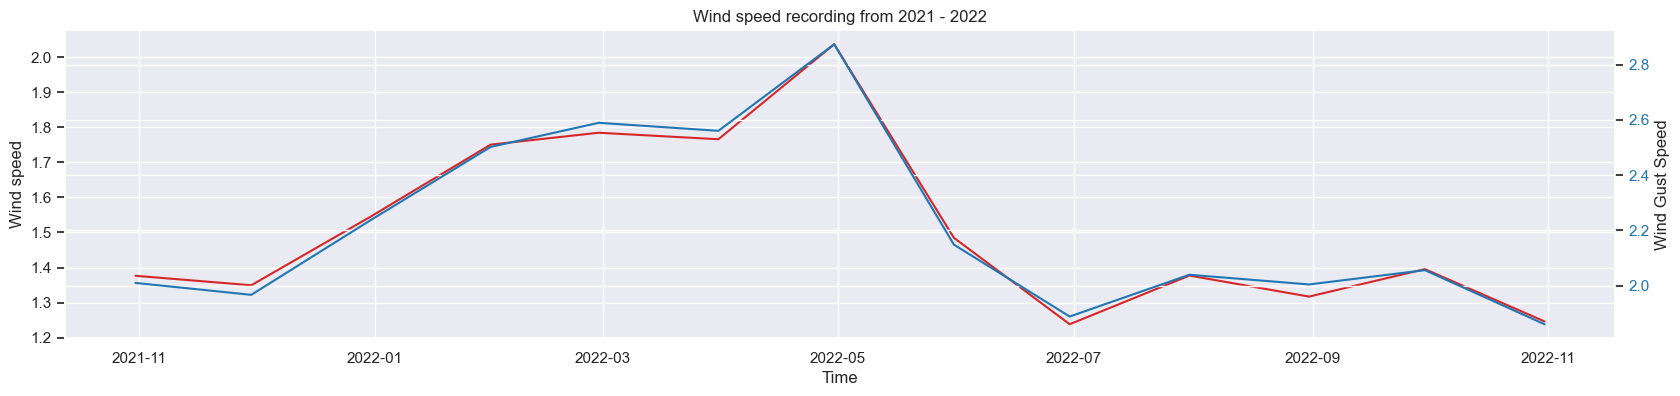

In [17]:
ws_indexed_df = df_corrected.loc[:, ['Timestamp', 'WS', 'WSgust']]
ws_indexed_df.set_index('Timestamp',inplace=True)
monthly_data =ws_indexed_df.resample('ME').mean()

def plot_df(df, x, y1 ,y2, title="", xlabel='Time', ylabel1='Wind speed',ylabel2='Wind Gust Speed', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y1, color='tab:red', label=ylabel1)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel1)
    ax2 = plt.gca().twinx()
    ax2.plot(x, y2, color='tab:blue', label=ylabel2)
    ax2.set_ylabel(ylabel2)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    plt.show()
    
plot_df(monthly_data, x=monthly_data.index, y1=monthly_data['WS'],y2=monthly_data['WSgust'], title='Wind speed recording from 2021 - 2022') 

_Windrose plot for speed and direction of wind_

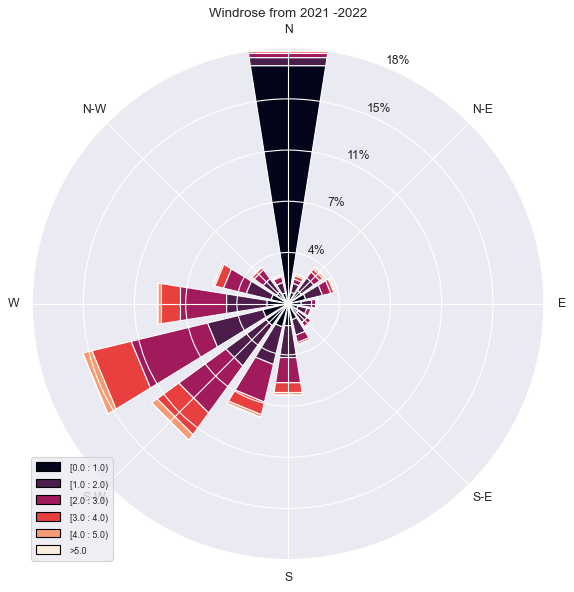

In [18]:
wd = df_corrected['WD']
ws = df_corrected['WS']
ax = WindroseAxes.from_ax()
ax.set_title("Windrose from 2021 -2022")
ax.bar(wd,ws,normed=True)
ax.set_legend()

fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.show()

6. **Temperature Analysis**

In [19]:
df_temp = df_corrected.loc[:,['Tamb','TModA','TModB']]
df_temp.corr()

,Tamb,TModA,TModB
Tamb,1.000000,0.756162,0.802555
TModA,0.756162,1.000000,0.985550
TModB,0.802555,0.985550,1.000000


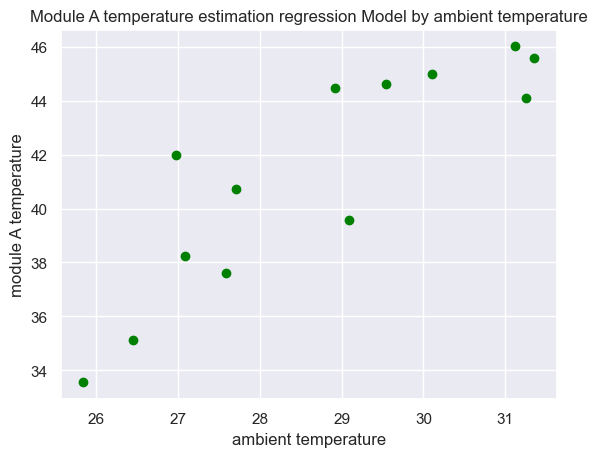

In [20]:
monthly_temp_data = df_corrected.loc[:, ['Timestamp', 'Tamb','TModA','TModB']]
monthly_temp_data.set_index('Timestamp',inplace=True)
monthly_temp_data =monthly_temp_data.resample('ME').mean()

plt.scatter(monthly_temp_data['Tamb'],monthly_temp_data['TModA'], color ="green")
plt.title('Module A temperature estimation regression model by ambient temperature')
plt.xlabel('ambient temperature')
plt.ylabel('module A temperature')
plt.show()

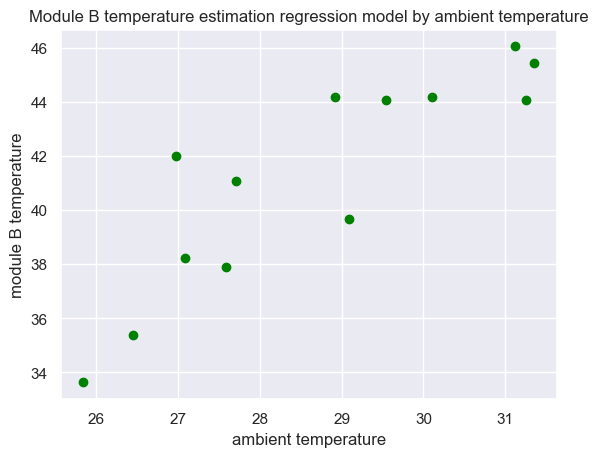

In [21]:
plt.scatter(monthly_temp_data['Tamb'],monthly_temp_data['TModB'], color ="green")
plt.title('Module B temperature estimation regression model by ambient temperature')
plt.xlabel('ambient temperature')
plt.ylabel('module B temperature')
plt.show()

7. **Histogram**

Text(0.5, 0, 'Variables')

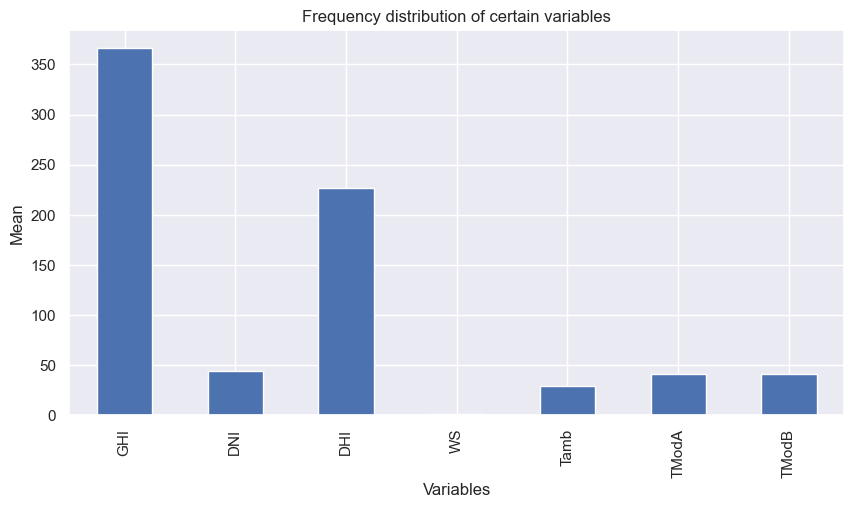

In [22]:
df_histo = df_corrected.loc[:, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb','TModA','TModB']]

#df_histo.set_index('Timestamp',inplace = True)
#df_histo = df_histo.resample('ME').mean()
df_histo.mean().plot(kind='bar', figsize=(10,5))

plt.title("Frequency distribution of certain variables")
plt.ylabel('Mean')
plt.xlabel('Variables')

8. **Box Plot**

<Axes: xlabel='GHI'>

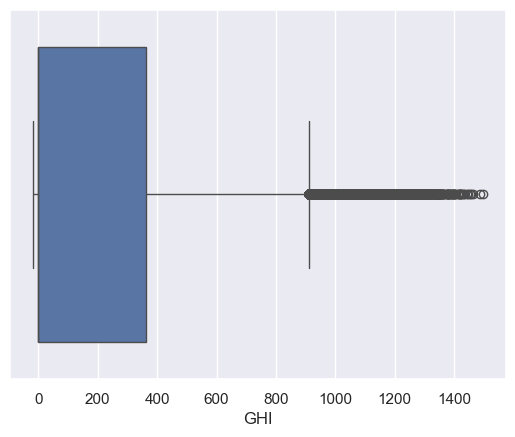

In [23]:
sns.boxplot(x=togo_df['GHI'])

<Axes: xlabel='DNI'>

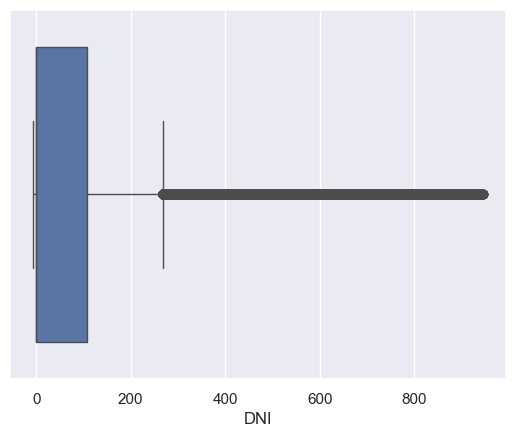

In [25]:
sns.boxplot(x=togo_df['DNI'])

<Axes: xlabel='DHI'>

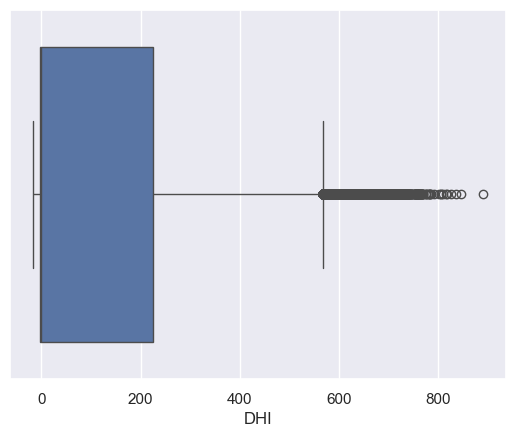

In [26]:
sns.boxplot(x=togo_df['DHI'])

<Axes: xlabel='Tamb'>

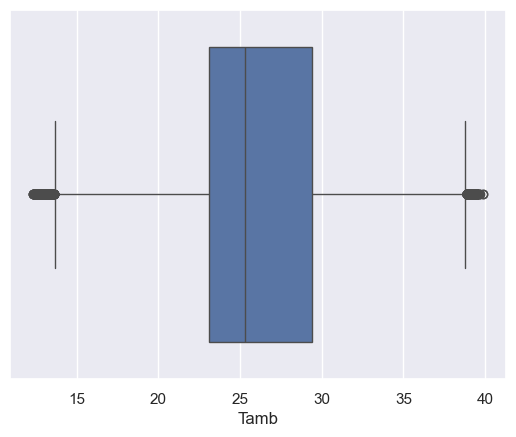

In [27]:
sns.boxplot(x=togo_df['Tamb'])

<Axes: xlabel='TModA'>

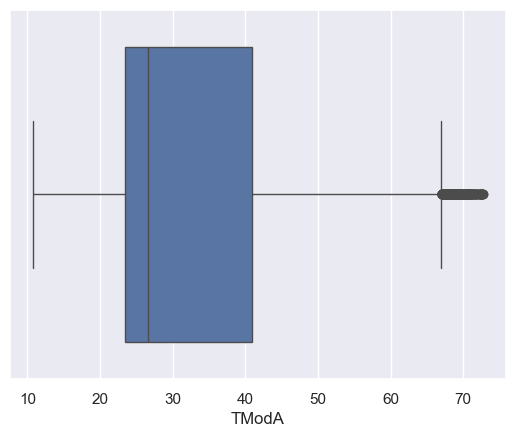

In [28]:
sns.boxplot(x=togo_df['TModA'])

<Axes: xlabel='TModB'>

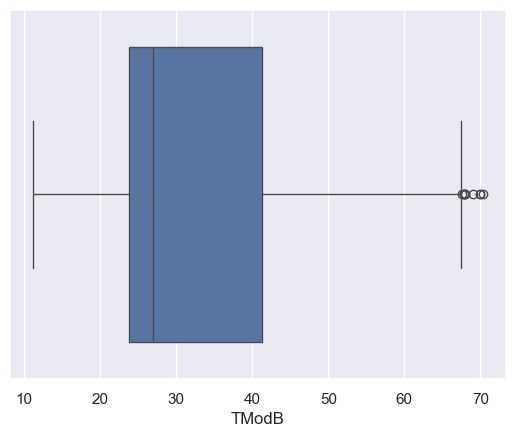

In [29]:
sns.boxplot(x=togo_df['TModB'])